# 클러스터링

## 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv("Lepidoptera.csv")
data

,species,nucleotide
0,Coleophora versurella,TAATAGGAACTTCTTTAAGTTTATTAATTCGAGCTGAATTAGGAAA...
1,Coleophora jaernaensis voucher,TACATTATATTTTATTTTTGGAATTTGAGCTGGAATAATAGGAACT...
2,Coleophora scabrida voucher,TTATATTTTATCTTTGGAATTTGAGCTGGAATAGTAGGAACTTCTT...
3,Coleophora detractella voucher,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACT...
4,Coleophora aragonensis voucher,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACT...
5,Coleophora remizella voucher,AACATTATATTTTATTTTTGGAATTTGAGCTGGGATAGTAGGAACT...
6,Coleophora succursella voucher,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATATTAGGAACT...
7,Coleophora argentula voucher,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACT...
8,Coleophora bucovinella voucher,TTATATTTTATTTTTGGAATTTGAGSCGGAATAGTAGGAACTTCTT...
9,Coleophora pappiferella voucher,AACATTATATTTTATTTTTGGAATTTGAGCTAGAATAGTAGGAACT...


## 데이터 상태 확인

In [3]:
check = [i for i in data.iloc[:, 1]]
check = ''.join(check)

In [4]:
seq = pd.DataFrame(list(check))
seq.value_counts()

T    5077
A    3685
C    1951
G    1755
S       1
dtype: int64

In [5]:
for i, nucleotide in enumerate(data['nucleotide']):
    if 'S' in nucleotide:
        print(i)
        break

8


* S 서열 제거

In [ ]:
d = data.copy()
d.drop(8, inplace=True)
d.reset_index(drop=True, inplace=True)

## 유사도 계산

### edit distance

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxp1uZg7Vb_cQdoJoIBHX2n8lP3iiuH4t9vA&usqp=CAU">

> https://web.stanford.edu/class/cs124/lec/med.pdf

In [6]:
def edit_distance(s1:str, s2: str):
    m = len(s1)+1
    n = len(s2)+1
    D = [[0]*m for _ in range(n)]
    D[0][0] = 0
    
    for i in range(1,m):
        D[0][i] = D[0][i-1] + 1
    
    for j in range(1,n):
        D[j][0] = D[j-1][0] + 1
    
    for i in range(1,n):
        for j in range(1,m):
            cost = 0

            if s1[j-1] != s2[i-1]:
                cost = 2
            
            D[i][j] = min(D[i-1][j] + 1, 
                          D[i][j-1] + 1, 
                          D[i-1][j-1] + cost)

    return D[n-1][m-1]

In [7]:
from tqdm import notebook

distance = [[0]*len(data) for i in range(len(data))]

for i in notebook.tqdm(range(len(data))):
    for j in range(len(data)):
        distance[i][j] = edit_distance(data.iloc[i, 1], data.iloc[j, 1])
        if distance[i][j] == 0: break  # 자기 자신과의 distance는 0이며 아후는 대칭적으로 수행되므로 반복할 필요없음

  0%|          | 0/19 [00:00<?, ?it/s]

In [8]:
distance = pd.DataFrame(distance).T
distance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,102,132,123,128,128,126,128,142,130,132,128,130,128,128,128,140,142,182
1,0,0,70,55,58,66,48,62,78,56,62,64,60,56,54,66,62,76,118
2,0,0,0,73,38,80,62,60,44,68,90,92,84,70,80,74,64,104,136
3,0,0,0,0,53,59,57,49,75,57,53,53,51,63,57,59,65,63,123
4,0,0,0,0,0,56,40,38,68,50,68,72,66,58,62,56,42,82,118
5,0,0,0,0,0,0,58,66,94,64,72,60,54,74,60,72,66,84,124
6,0,0,0,0,0,0,0,40,68,58,68,78,56,62,60,58,52,82,116
7,0,0,0,0,0,0,0,0,62,60,64,72,62,64,64,50,42,70,118
8,0,0,0,0,0,0,0,0,0,82,86,96,82,70,84,64,74,98,142
9,0,0,0,0,0,0,0,0,0,0,66,70,60,60,56,66,60,80,114


In [9]:
index_label = []
for i, species in enumerate(data.loc[:, 'species']):
    n = f' 0{str(i)}' if len(str(i)) < 2 else f' {str(i)}'
    index_label.append(species + n)

## 결과 시각화

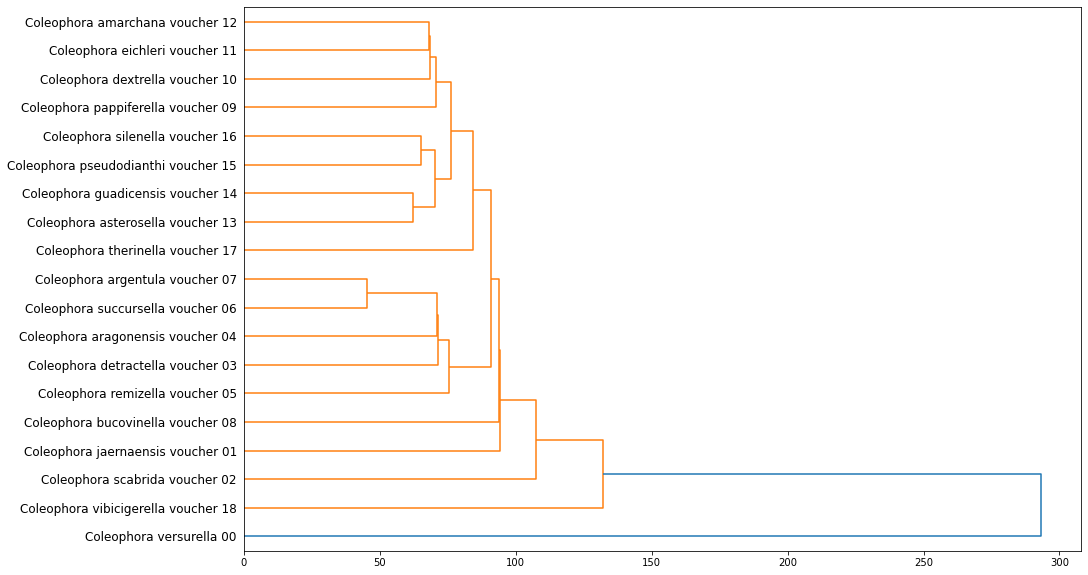

In [10]:
#계층적 클러스터링
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
Z = sch.linkage(distance.to_numpy())
sch.dendrogram(Z, labels=index_label, orientation='right')
plt.show()

# 예제

## 데이터 로드

In [39]:
human_dna = pd.read_table('human.txt')
chimp_dna = pd.read_table('chimpanzee.txt')
dog_dna = pd.read_table('dog.txt')

## 데이터 상태 확인

In [12]:
human_dna

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


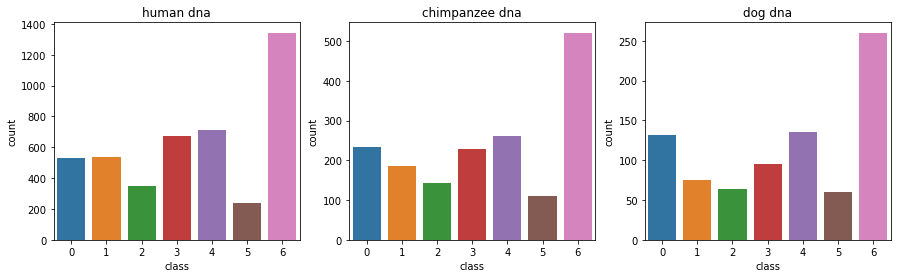

In [13]:
gp = plt.figure(figsize=(15,4))
    
ax = gp.add_subplot(1, 3, 1)
sns.countplot(data=human_dna, x='class')
ax.set_title('human dna')

ax = gp.add_subplot(1, 3, 2)
sns.countplot(data=chimp_dna, x='class')
ax.set_title('chimpanzee dna')

ax = gp.add_subplot(1, 3, 3)
sns.countplot(data=dog_dna, x='class')
ax.set_title('dog dna');

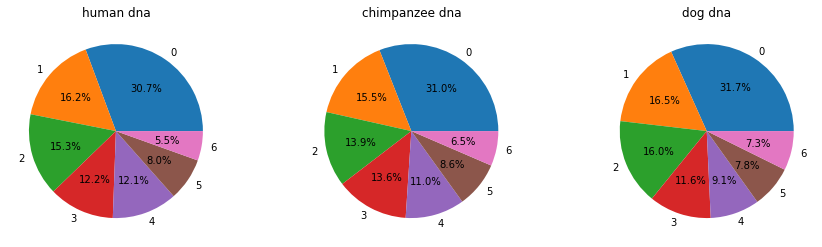

In [34]:
gp = plt.figure(figsize=(15,4))
    
ax = gp.add_subplot(1, 3, 1)
plt.pie(human_dna['class'].value_counts(), labels=np.unique(human_dna['class']), autopct='%.1f%%');
ax.set_title('human dna')

ax = gp.add_subplot(1, 3, 2)
plt.pie(chimp_dna['class'].value_counts(), labels=np.unique(human_dna['class']), autopct='%.1f%%');
ax.set_title('chimpanzee dna')

ax = gp.add_subplot(1, 3, 3)

plt.pie(dog_dna['class'].value_counts(), labels=np.unique(human_dna['class']), autopct='%.1f%%');
ax.set_title('dog dna');

## 전처리

### K-mer

In [14]:
def Kmer(data, size=6):
    seq = data.copy()
    for i, j in enumerate(seq['sequence']):
        seq.at[i, 'sequence'] = [j[x:x+size].lower() for x in range(len(j) - size + 1)]
        # 리스트를 value로 사용하면 오류 발생하므로 at 사용
    return seq

In [40]:
human_dna = Kmer(human_dna)
chimp_dna = Kmer(chimp_dna)
dog_dna = Kmer(dog_dna)

In [41]:
human_dna.head()

,sequence,class
0,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...",4
1,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...",4
2,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...",3
3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...",3
4,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...",3


### Bag of Words

* kmer 개수 카운트

In [17]:
def BoW(dna):
    x = list(dna['sequence'])
    for item in range(len(x)):
        x[item] = ' '.join(x[item])
    
    y = dna['class'].values
    
    return x, y

In [36]:
human_x, human_y = BoW(human_dna)
chimp_x, chimp_y = BoW(chimp_dna)
dog_x, dog_y = BoW(dog_dna)

In [37]:
human_x

['A T G C C C C A A C T A A A T A C T A C C G T A T G G C C C A C C A T A A T T A C C C C C A T A C T C C T T A C A C T A T T C C T C A T C A C C C A A C T A A A A A T A T T A A A C A C A A A C T A C C A C C T A C C T C C C T C A C C A A A G C C C A T A A A A A T A A A A A A T T A T A A C A A A C C C T G A G A A C C A A A A T G A A C G A A A A T C T G T T C G C T T C A T T C A T T G C C C C C A C A A T C C T A G',
 'A T G A A C G A A A A T C T G T T C G C T T C A T T C A T T G C C C C C A C A A T C C T A G G C C T A C C C G C C G C A G T A C T G A T C A T T C T A T T T C C C C C T C T A T T G A T C C C C A C C T C C A A A T A T C T C A T C A A C A A C C G A C T A A T C A C C A C C C A A C A A T G A C T A A T C A A A C T A A C C T C A A A A C A A A T G A T A A C C A T A C A C A A C A C T A A A G G A C G A A C C T G A T C T C T T A T A C T A G T A T C C T T A A T C A T T T T T A T T G C C A C A A C T A A C C T C C T C G G A C T C C T G C C T C A C T C A T T T A C A C C A A C C A C C C A 

* 순서를 유지하여 생성

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4))
human_x = cv.fit_transform(human_x)

chimp_x = cv.transform(chimp_x)
dog_x = cv.transform(dog_x)

ValueError: empty vocabulary; perhaps the documents only contain stop words

## 모델 정의

### 데이터 분할

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(human_x, human_y, test_size = 0.2, random_state=3)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

### 평가 지표 정의

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [23]:
def get_metrics(y_test, y_predicted):
    display(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predicted, name='Predicted')).\
            style.background_gradient(cmap='Reds'))
    
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    
    print(f'\naccuracy \t= {round(accuracy, 2)} \
    \nprecision \t= {round(precision, 2)} \
    \nrecall \t\t= {round(recall, 2)} \
    \nf1-score \t= {round(f1, 2)}')


## 결과 확인

In [24]:
get_metrics(y_test, model.predict(x_test))

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,91,1,1,2,4,3,3
1,16,81,0,1,3,0,1
2,7,2,63,0,0,0,5
3,11,3,0,106,3,0,4
4,13,0,0,8,115,2,7
5,7,0,0,1,3,38,2
6,26,1,1,9,11,0,221



accuracy 	= 0.82     
precision 	= 0.84     
recall 		= 0.82     
f1-score 	= 0.82


In [25]:
get_metrics(chimp_y, model.predict(chimp_x))

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,208,7,0,9,3,4,3
1,4,169,0,7,0,2,3
2,3,0,136,0,3,0,2
3,14,6,0,201,5,2,0
4,6,4,1,10,230,7,3
5,0,2,0,1,3,98,5
6,16,3,3,15,20,0,464



accuracy 	= 0.9     
precision 	= 0.9     
recall 		= 0.9     
f1-score 	= 0.9


In [26]:
get_metrics(dog_y, model.predict(dog_x))

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,57,7,2,11,24,10,20
1,8,31,3,6,13,3,11
2,2,3,43,5,2,2,7
3,15,5,2,43,16,4,10
4,26,10,5,14,55,5,20
5,13,0,0,9,5,17,16
6,22,10,9,16,32,15,156



accuracy 	= 0.49     
precision 	= 0.5     
recall 		= 0.49     
f1-score 	= 0.49


In [27]:
human = pd.DataFrame([''.join([''.join(i).upper() for i in human_dna.sequence])], columns=['nucleotide'])
chimp = pd.DataFrame([''.join([''.join(i).upper() for i in chimp_dna.sequence])], columns=['nucleotide'])
dog = pd.DataFrame([''.join([''.join(i).upper() for i in dog_dna.sequence])], columns=['nucleotide'])

In [28]:
test = pd.concat([human, chimp, dog])
test.insert(0, 'species', ['human', 'chimpanzee', 'dog'])
test = test.reset_index(drop=True)
test

,species,nucleotide
0,human,ATGCCCTGCCCCGCCCCACCCCAACCCAACCCAACTCAACTAAACT...
1,chimpanzee,ATGCCCTGCCCCGCCCCACCCCAACCCAACCCAACTCAACTAAACT...
2,dog,ATGCCATGCCACGCCACACCACAGCACAGCACAGCTCAGCTAAGCT...
